On remplace selon la vidéo de Codebasics le previous ANN model by a CNN model

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

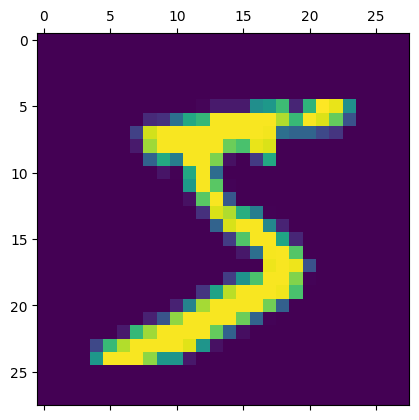

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

ANN : 

In [20]:
# Définir le modèle ANN
modelANN = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compiler le modèle
modelANN.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Entraîner le modèle et capturer l'historique
history_ann = modelANN.fit(X_train, y_train, epochs=10)

# Vous pouvez maintenant accéder à l'historique
print(history_ann.history)  # Affiche les métriques comme 'accuracy' et 'loss'

c:\Users\andre\anaconda3\envs\env5\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8714 - loss: 0.4560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9632 - loss: 0.1288
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9727 - loss: 0.0902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9799 - loss: 0.0644
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9848 - loss: 0.0497
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9874 - loss: 0.0404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9911 - loss: 0.0310
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9925 - loss: 0.0252
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9949 - loss: 0.0189
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9942 - loss: 0.0203
{'accuracy': [0.9232166409492493, 0.9641666412353516, 0.9740333557128906, 0.9796500205993652, 0.9837166

In [21]:
modelANN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1064


[0.0893038809299469, 0.9775999784469604]

In [23]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>maintenant CNN for classification</h3>

In [26]:
modelCNN = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [31]:
modelCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle et capturer l'historique
history_cnn = modelCNN.fit(X_train, y_train, epochs=10)

# Vous pouvez maintenant accéder à l'historique
print(history_cnn.history)  # Affiche les métriques comme 'accuracy' et 'loss'

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9961 - loss: 0.0125
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9980 - loss: 0.0064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9976 - loss: 0.0071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9985 - loss: 0.0049
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9992 - loss: 0.0030
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9985 - loss: 0.0043
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9986 - loss: 0.0031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9989 - loss: 0.0027
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9994 - loss: 0.0015
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9988 - loss: 0.0027
{'accuracy': [0.9957333207130432, 0.9971833229064941, 0.9976333379745483, 0.99795001745224, 0.99923330545

In [32]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
modelCNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0790


[0.06683029979467392, 0.9865000247955322]

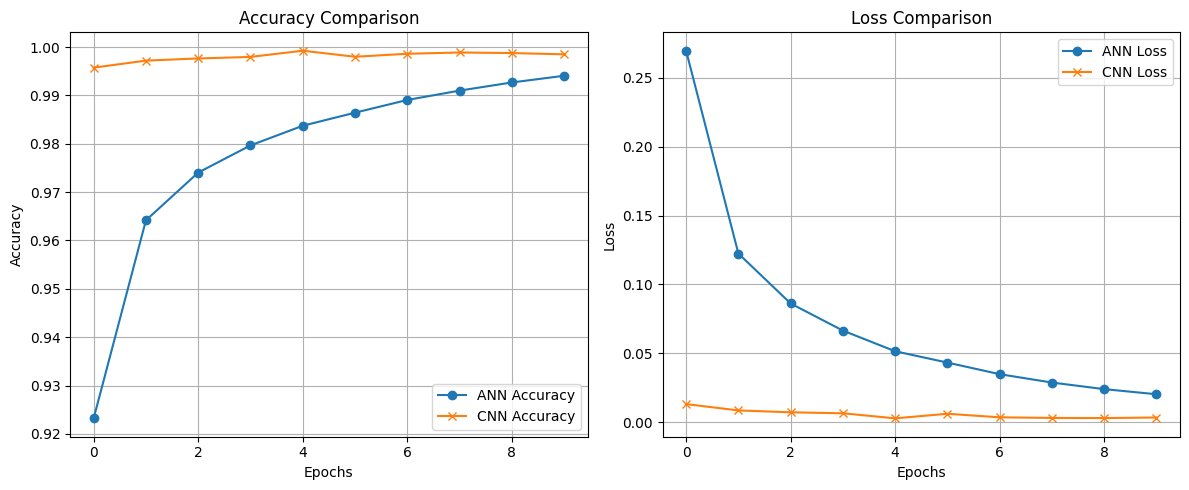

In [34]:
import matplotlib.pyplot as plt

# Supposons que vous avez déjà entraîné vos modèles et que vous avez leurs historiques
# Exemple : history_ann et history_cnn contiennent les historiques des modèles ANN et CNN

# Comparaison des accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='ANN Accuracy', marker='o')
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy', marker='x')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='ANN Loss', marker='o')
plt.plot(history_cnn.history['loss'], label='CNN Loss', marker='x')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()